In [18]:
import os
import pandas as pd
import librosa
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
def create_MFCC_coefficients(file_name):
    sr_value = 44100
    n_mfcc_count = 20

    try:
        y, sr = librosa.load(file_name, sr=sr_value)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc_count)
        coeff_df = (pd.DataFrame(mfccs)).transpose()
        return coeff_df

    except Exception as e:
        print(f"Error creating MFCC coefficients: {file_name}:{str(e)}")

songs/kishore/old_Souten -Zindagi Pyar Ka(male).mp3  done
songs/kishore/old_Sharabi-de de pyar de(male).mp3  done
songs/kishore/bollywood_MKS 1978 - O Saathi Re Tere Bina.mp3  done
songs/kishore/old_Andaz-Zindagi Ek Safar Hai.mp3  done
songs/kishore/old_Saagar-Sagar Jaisi Aankhon Wali.mp3  done
songs/kishore/old_Anurodh-Aate Jaate Khoobsurat.mp3  done
songs/kishore/old_CC-Chalte Chalte Mere Yeh Geet.mp3  done
songs/kishore/old_Aradhana-Roop Tera Mastana.mp3  done
songs/kishore/old_BM-Pal Pal Dil Ke Pas.mp3  done
songs/kishore/bollywood_MKS 1978 - Rote Hue Aate Hai Sab.mp3  done
songs/kishore/Kiska Rasta Dekhe.mp3  done
songs/kishore/Meri Bheegi Bheegi Si.mp3  done
songs/kishore/old_MJS-Chala Jata Hoon.mp3  done
songs/kishore/old_ek_ajnabee_haseena_se.mp3  done
songs/kishore/old_Parichay-Musafir Hoon Yaaron.mp3  done
songs/kishore/zindagi_ki_safar_main.mp3  done
songs/kishore/old_MJS-O Mere Dil Chain.mp3  done
songs/kishore/old_Aradhana-Mere Sapno Ki Rani Kab.mp3  done
songs/kishore/old

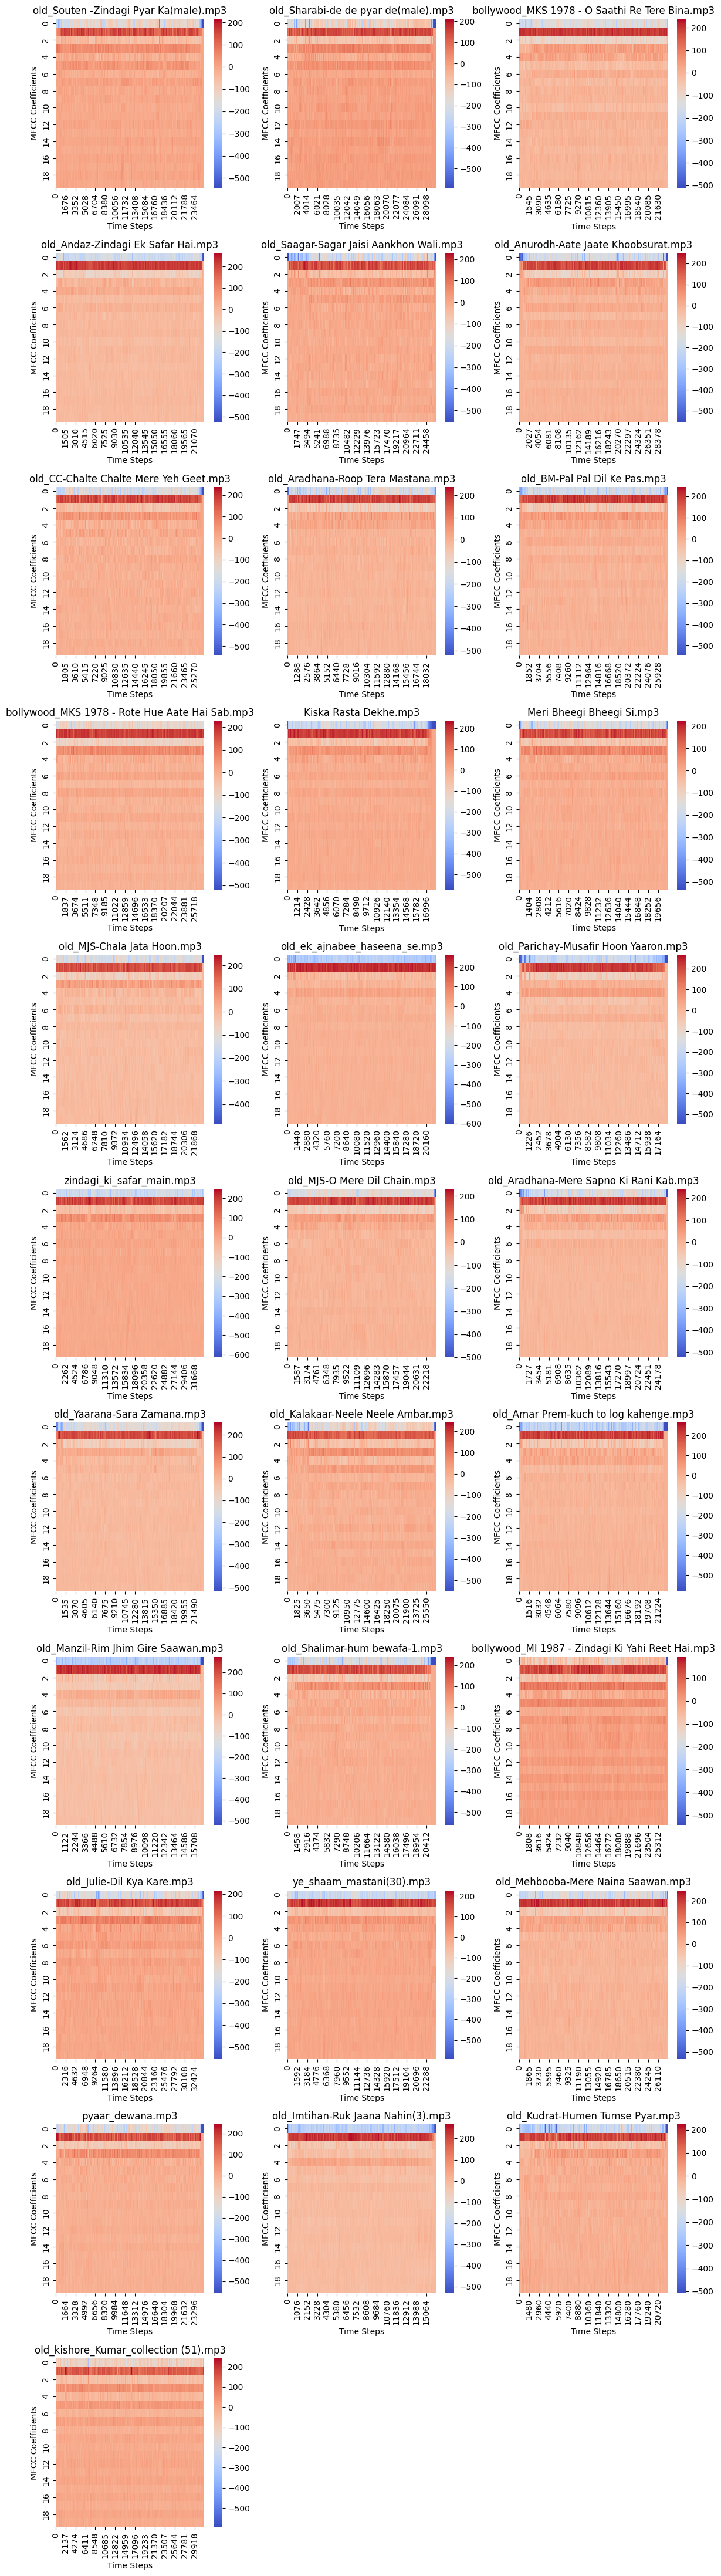

In [ ]:
asha_folder = "songs/kishore"
asha_songs = [os.path.join(asha_folder, song) for song in os.listdir(asha_folder) if song.endswith(('.mp3', '.wav'))]

num_songs = len(asha_songs)
cols = 3
rows = (num_songs + cols - 1) // cols  # Calculate rows needed based on columns

# Plotting
fig, axs = plt.subplots(rows, cols, figsize=(12, rows * 4))  # Adjust figure size as needed

for idx, song_path in enumerate(asha_songs):
    row = idx // cols
    col = idx % cols
    ax = axs[row, col] if rows > 1 else axs[col]
    
    # Generate MFCCs
    mfcc = create_MFCC_coefficients(song_path)  # Use your existing function
    print(song_path, " done")
    
    # Plot MFCC heatmap
    sns.heatmap(mfcc.T, cmap='coolwarm', cbar=True, ax=ax)
    
    # Set titles and labels
    ax.set_title(os.path.basename(song_path))
    ax.set_xlabel("Time Steps")
    ax.set_ylabel("MFCC Coefficients")

# Remove any empty subplots
for empty_idx in range(num_songs, rows * cols):
    fig.delaxes(axs.flat[empty_idx])

plt.tight_layout()
plt.show()
